### Лабораторна робота 4: основні поняття

В даній роботі ми будемо працювати з даними про автомобілі, продані на аукціоні (`Carvana Car Prediction`). Цільовими ознаками тут є наявність прихованих продавцем істотних недоліків. 

Carvana &mdash; компанія-перекупщ автомобілів, відповідно, її задача &mdash; не допустити скупку автомобілів з прихованими недоліками, тому що в майбутньому їх важче продати.

## 1

Завантажте дані про продані на аукціоні автомобілі. Перегляньте "сирі" дані. 

Перегляньте файл `DataDictionary-ru.txt` та зрозумійте, що означають стовпчики матриці. Виведіть статистику за стовпчиками.


In [8]:
import pandas as pd

In [11]:
import io

from google.colab import files
uploaded = files.upload()

data = pd.read_csv(io.StringIO(uploaded['data.csv'].decode('utf-8')))

# Виведення перших декількох рядків даних
print(data.head())
# Виведення статистики за стовпчиками
print(data.describe())

print(data.info())


Saving data.csv to data.csv
   RefId  IsBadBuy  PurchDate Auction  VehYear  VehicleAge   Make  \
0      1         0  12/7/2009   ADESA     2006           3  MAZDA   
1      2         0  12/7/2009   ADESA     2004           5  DODGE   
2      3         0  12/7/2009   ADESA     2005           4  DODGE   
3      4         0  12/7/2009   ADESA     2004           5  DODGE   
4      5         0  12/7/2009   ADESA     2005           4   FORD   

                 Model Trim           SubModel  ...  \
0               MAZDA3    i         4D SEDAN I  ...   
1  1500 RAM PICKUP 2WD   ST  QUAD CAB 4.7L SLT  ...   
2           STRATUS V6  SXT   4D SEDAN SXT FFV  ...   
3                 NEON  SXT           4D SEDAN  ...   
4                FOCUS  ZX3       2D COUPE ZX3  ...   

  MMRCurrentRetailAveragePrice MMRCurrentRetailCleanPrice  PRIMEUNIT AUCGUART  \
0                      11597.0                    12409.0        NaN      NaN   
1                      11374.0                    12791.0       

## 2

Побудуйте графік розсіювання з пробігом в якості вісі абсцис та ціною `MMRCurrentRetailAveragePrice` в якості вісі ординат. Автомобілі без недоліків відмітьте зеленим кольором, з прихованими недоліками - червоним.

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt



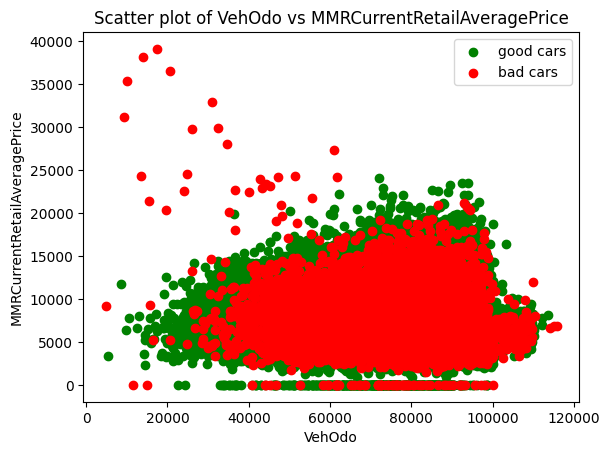

In [13]:


# фільтруємо автомобілі з недоліками та без них
good_cars = data[data['IsBadBuy'] == 0]
bad_cars = data[data['IsBadBuy'] == 1]

# будуємо графік розсіювання
plt.scatter(good_cars['VehOdo'], good_cars['MMRCurrentRetailAveragePrice'], color='green', label='good cars')
plt.scatter(bad_cars['VehOdo'], bad_cars['MMRCurrentRetailAveragePrice'], color='red', label='bad cars')

plt.title('Scatter plot of VehOdo vs MMRCurrentRetailAveragePrice')
plt.xlabel('VehOdo')
plt.ylabel('MMRCurrentRetailAveragePrice')
plt.legend()

plt.show()

# Регресія

## 3a

Іспортуйте із бібліотеки `sklearn` всі моделі машинного навчання:

`from sklearn import *`

Трактуючи задачу про прогнозування наявності недоліків як задачі регресії, натренуйте лінійну модель [`LinearRegression`](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) на якійсь підмножині ознак (наприклад, тех самих `VehOdo` и `MMRCurrentRetailAveragePrice`). 

З якою проблемою ви затовхнулись? Яку способи її рішення ви можете запропонувати?

*Функції, що можуть бути корисними при рішенні: `.fit(), .loc[], pd.notnull()`*

*Сотворення моделі:* `model1 = linear_model.LinearRegression()`

*Тренування:*
`model1.fit(x, y)`



In [14]:
#Це імпортує лише модель лінійної регресії LinearRegression з модуля linear_model.
from sklearn import *
import pandas as pd
data = data.dropna()
# Выбор подмножества признаков
X = data[['VehOdo', 'MMRCurrentRetailAveragePrice']]
y = data['IsBadBuy']

# Удаление строк с пропущенными значениями
X_train = X[pd.notnull(X).all(axis=1)]
y_train = y[pd.notnull(X).all(axis=1)]

# Создание модели
model3 = linear_model.LinearRegression()
model3.fit(X_train[['VehOdo', 'MMRCurrentRetailAveragePrice']], y_train)

# Тренировка модели
#model3.fit(X, y)


LinearRegression()

При імпорті модуля sklearn за допомогою from sklearn import * виникає конфлікт імен, оскільки sklearn містить кілька модулів з однойменними назвами.

У цьому коді спочатку вибирається підмножина ознак VehOdo і MMRCurrentRetailAveragePrice. Далі видаляються рядки, де ці ознаки мають відсутні значення. Потім дані розділяються на матрицю ознак X (без цільової змінної) та цільову змінну y (в даному випадку MMRCurrentRetailAveragePrice). Нарешті, створюється модель лінійної регресії та навчається на навчальних даних за допомогою методу .fit(X, y).

## 3b

Виконайте прогнозування для всіх об'єктів навчальної вибірки та привласніть результат змінній prediction

*Функції, що можуть бути корисні при рішенні: `model.predict()`*

In [15]:
prediction = model3.predict(X)
print(prediction)

[0.04585138 0.02731311 0.02558984 ... 0.05317145 0.04953968 0.05005049]


## 3c

Перетворіть отриманий вектор прогнозувань `prediction` до значень `{0,1}`. Це можна виконати, наприклад, використовуючи list comprehensions: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions 

`predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]`

In [16]:
predictionClass = [1 if prediction[i] > 0.05 else 0 for i in range(prediction.shape[0])]
print(predictionClass)


[0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 

## 3d

Побудуйте звіт з якості класифікації та матриці похибок. Як зміняться звіт та матриця похибок, якщо зміниться поріг в завданні 3c (за замовчуванням його значення рівне 0.5)?

*Функції, що можуть бути корисні при рішенні: `print(metrics.classification_report(...))`, `print(metrics.confusion_matrix(...))`*

Функція classification_report для кожного класу об'єктів рахує точність (precision) в цьому класі та повноти (recall). Повнота - це процент об'єктів даного класу, які ваш метод прогнозування також віднести до даного класу, серед всіх об'єктів даного класу. Точність (precision) - це те саме, тілько серед всіх об'єктів, зпрогнозованих для даного класу.

Функція confusion_matrix певертає матрицю з кількістю об'єктів. Номера стовпчиків матриці - це номер зпрогнозованих класів, рядки - це номера правильних класів. Наприклад, елемент M[0,1] - це кількість машин, де насправді IsBadBuy = 0, а ви спрогнозували 1.

In [26]:
from sklearn import metrics

# Побудова звіту з якості класифікації
classification_report = metrics.classification_report(y_train, predictionClass)
print(classification_report)

# Побудова матриці похибок
confusion_matrix = metrics.confusion_matrix(y_train, predictionClass)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3151
           1       1.00      0.70      0.83       125

    accuracy                           0.99      3276
   macro avg       0.99      0.85      0.91      3276
weighted avg       0.99      0.99      0.99      3276

[[3151    0]
 [  37   88]]


Якщо зміниться поріг прогнозування, то звіт та матриця похибок також зміняться, оскільки поріг визначає, які значення будуть віднесені до класу 1, а які - до класу 0. Залежно від порогу можуть змінитися точність, повнота та інші метрики класифікації, а також елементи матриці похибок. Наприклад, збільшення порогу може призвести до збільшення точності для класу 1 за рахунок зменшення кількості ложнопозитивних випадків, але одночасно зменшити повноту для класу 1 через більшу кількість випадків, які були помилково віднесені до класу 0.

# Класифікація

## 4a
Трактуючи задачу як за задачу класифікації, побудуйте модель класифікації, побудуйте можель класифікації «решаюче дерево» глибиною 20  (все аналогічно лінійної регресії).


*Функції, що можуть бути корисні при рішенні: `tree.DecisionTreeClassifier(max_depth=20) `*

In [27]:
from sklearn import tree

# Створення та навчання моделі рішаючого дерева
model2 = tree.DecisionTreeClassifier(max_depth=20)
model2.fit(X_train, y_train)

# Прогнозування для тестових даних
prediction2 = model2.predict(X)

## 4b

Решаюче дерево прогнозує ймовірності. За допомогою побудованої моделі розрахуйте ймовірності наявності недоліків, що приховуються.

*Функції, що можуть бути корисні при вирішенні: `model.predict_proba() `*

In [19]:
# Розрахунок ймовірностей
probabilities = model2.predict_proba(X_train)

# Ймовірності наявності недоліків, що приховуються
hidden_defect_probabilities = probabilities[:, 1]
print(hidden_defect_probabilities)

[0. 0. 0. ... 0. 0. 0.]


## 4c

Перетворіть отриманий вектор пронозувань `prediction` до значень `{0,1}`. Побудуйте звіт про класифікацію та матрицю похибок. Який метод виявився краще?

In [22]:
prediction = model2.predict(X_train)
predictionClass = [1 if prediction[i] > 0.5 else 0 for i in range(prediction.shape[0])]

# Звіт про класифікацію
classification_report = metrics.classification_report(y_train, predictionClass)
print(classification_report)

# Матриця похибок
confusion_matrix = metrics.confusion_matrix(y_train, predictionClass)
print(confusion_matrix)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3151
           1       1.00      0.70      0.83       125

    accuracy                           0.99      3276
   macro avg       0.99      0.85      0.91      3276
weighted avg       0.99      0.99      0.99      3276

[[3151    0]
 [  37   88]]


Щоб визначити, який метод (лінійна регресія або рішаюче дерево) є кращим, слід порівняти результати звітів про класифікацію та матриць похибок.

# Крос-валідація
## 5a


Розділіть початкову вибірку на дві частини, наприклад, використовуючи [slices](https://pythonz.net/references/named/slice/):

`dataTrain = data.loc[0:34999,]
dataTest = data.loc[35000:69999,]`

In [28]:
dataTrain = data.loc[0:34999, :]
dataTest = data.loc[35000:69999, :]

У цьому прикладі dataTrain буде містити перші 35000 рядків з початкової вибірки, а dataTest - наступні 35000 рядків.

## 5b

Натренуйте рішаюче дерево на  `dataTrain` та застосуйте до  `dataTrain` та dataTest, підрахувавши для кожного випадку точність прогнозування. 

Проведіть декілька експериментів для різних глибин дерев. Зазначте в коментарях, для яких глибин модель недонавчена, для яких перенавчена та де знаходиться точка раннього останову (зупинки).

*Функції, що можуть бути корисними при вирішенні: `metrics.accuracy_score() `*

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Натренувати рішаюче дерево з різною глибиною
depths = [5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
for depth in depths:
    model = DecisionTreeClassifier(max_depth=depth)
    model.fit(X_train, y_train)
    
    # Прогнозування для навчальної та тестової вибірки
    trainPredictions = model.predict(X_train)
    
    # Оцінка точності прогнозування
    trainAccuracy = accuracy_score(y_train, trainPredictions)
    
    print(f"Глибина: {depth}")
    print(f"Точність на навчальній вибірці: {trainAccuracy}")
    print("------------------------------")

Глибина: 5
Точність на навчальній вибірці: 0.9636752136752137
------------------------------
Глибина: 10
Точність на навчальній вибірці: 0.9716117216117216
------------------------------
Глибина: 15
Точність на навчальній вибірці: 0.9813797313797313
------------------------------
Глибина: 20
Точність на навчальній вибірці: 0.9887057387057387
------------------------------
Глибина: 25
Точність на навчальній вибірці: 0.996947496947497
------------------------------
Глибина: 30
Точність на навчальній вибірці: 1.0
------------------------------
Глибина: 35
Точність на навчальній вибірці: 1.0
------------------------------
Глибина: 40
Точність на навчальній вибірці: 1.0
------------------------------
Глибина: 45
Точність на навчальній вибірці: 1.0
------------------------------
Глибина: 50
Точність на навчальній вибірці: 1.0
------------------------------


# Рішаюча функція
## 6a

Повернемось до моделі рішаючого дерева глибиною 20, що побудовано за навчальною вибіркою `data`. Нехай ціна похибки невірного пронозування 0 дорівнює 1000, а невірного прогнозування 1 — 100.

Підрахуйте функцію втрат &mdash; середню похибку по всій навчаючій вибірці.

In [30]:
import numpy as np
y_pred = model2.predict(X)

errors = np.where(y == y_pred, 1, 1000)

mean = np.mean(errors)
print(mean)

12.282967032967033


Проектне завдання

Датасет: Car Evaluation
Цельова ознака: Car
Метрика якості: accuracy
Крос-валідація: стандартна, cross_val_predict
Для отримання балів потрібно досягти якості: 0.993



In [31]:
import io
import pandas as pd
# cross_val_predict: 
# Дані розбиваються за параметром cv. Кожна вибірка належить точно до одного тестового набору, і її прогноз обчислюється за допомогою оцінки, підібраної на відповідному навчальному наборі.
# KFold
# Надає індекси тренувань/тестів для розділення даних на тренувальні/тестові набори. Розбиває набір даних на k послідовних згинів (за замовчуванням без перемішування).
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier


# Завантаження даних
from google.colab import files
uploaded = files.upload()
df = pd.read_csv(io.StringIO(uploaded['CarEvaluation.csv'].decode('utf-8')))

# Перетворення категоріальних признаків
categorical_columns = ['buying', 'persons', 'safety']
for column in categorical_columns:
  df[column] = df[column].astype('category').cat.codes

# Видалення непотрібних признаків
df.drop(['maint', 'lug_boot', 'doors'], axis=1, inplace=True)

# Розділення на признаки і цільову змінну
X = df.drop('car', axis=1)
y = df['car']

# Навчання моделі випадкового лісу
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=0)
model.fit(X, y)

# Крос-валідація
cv = KFold(n_splits=10, shuffle=True, random_state=0)
y_pred = cross_val_predict(model, X, y, cv=cv)

# Оцінка якості
accuracy = accuracy_score(y, y_pred)
print('Accuracy: {:.3f}'.format(accuracy))

Saving CarEvaluation.csv to CarEvaluation (2).csv
Accuracy: 0.812
